## Customer Segmentation App

### Goal/Objective
To create an application that segments customers of a mall into different and distinct groups. The plan is to use this segmetation to customise  products and experiences for each of the gropup so they can get the best from our services.

### Task
Using a customer dataset from a mall, build a machine learning model (unsupervised learning) that would segment the customers into unique groups.

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans, MeanShift
from sklearn.neural_network import MLPClassifier

In [2]:
# Import the dataset
dataset = pd.read_csv('Mall_Customers.csv')

# Display the first 5 rows of the dataset
print(dataset.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


### Column Names Explained 

CustomerID - Unique ID assigned to the customer

Gender - Gender of the customer

Age - Age of the customer

Annual Income (k$) - Annual Income of the customee

Spending Score (1-100) - Score assigned by the mall based on customer behavior and spending nature

In [3]:
# Check the shape of the dataset
print(dataset.shape)

(200, 5)


There are 200 rows and 5 columns

In [4]:
# Check the summary of the dataset
print(dataset.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


- The max, mean and min age are 70, 38 and 18 respectively
- The max, mean and min annual income are 137k, 60k and 15k respectively
- Using the standard deviation, the data points for annual income and spending score are far from the mean 

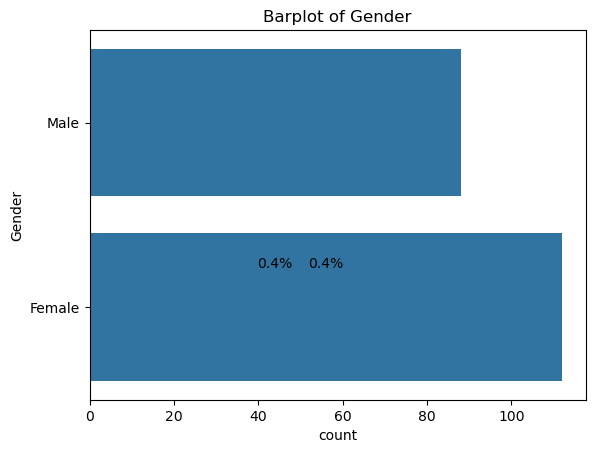

In [5]:
# Bar plot of the spread of categorical column - Gender
ax = sns.countplot(dataset['Gender'])
plt.title('Barplot of Gender')

# Calculate the total count of entries
total = len(dataset)

# Add percentage labels to each bar
for p in ax.patches:
    count = p.get_height()  # Get the height (count) of each bar
    percentage = f'{100 * count / total:.1f}%'  # Calculate percentage
    ax.annotate(percentage,  # Label with percentage
                (p.get_x() + p.get_width() / 2, count),  # Position of the label
                ha='center',  # Horizontal alignment
                va='bottom')  # Vertical alignment
    
plt.show()

- 66% of the data points are female while 44% are male

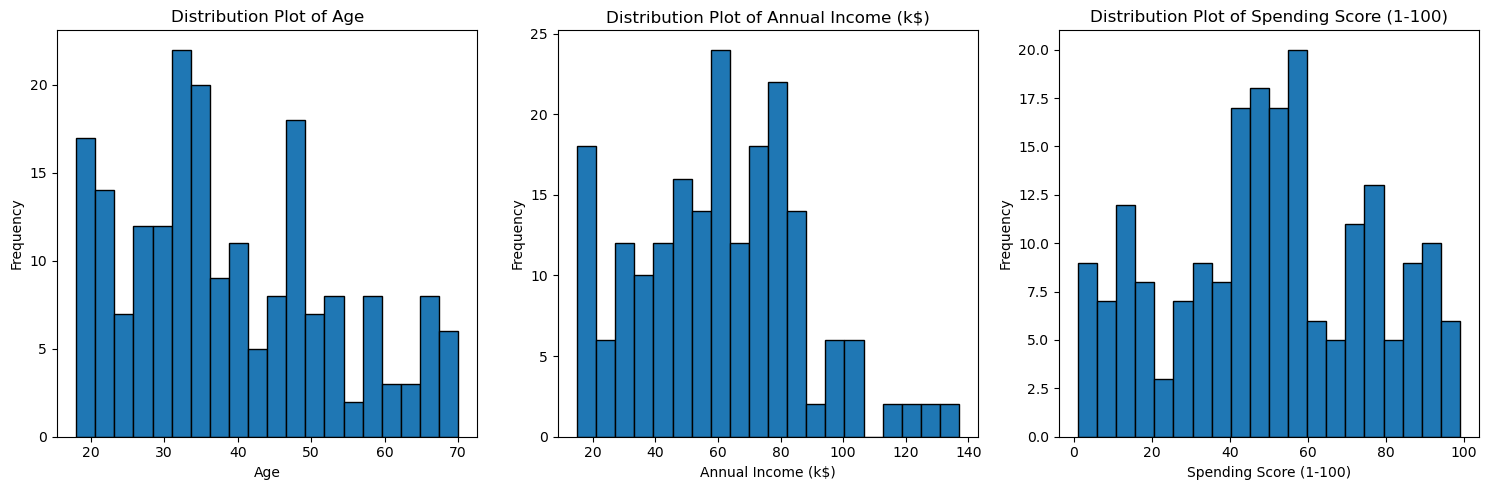

In [6]:
# Show the distribution of the Age, Annual Income and Spending Score

# List of columns to plot
columns_to_plot = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each column in a separate subplot
for i, column in enumerate(columns_to_plot):
    axes[i].hist(dataset[column], bins=20, edgecolor='black')
    axes[i].set_title(f'Distribution Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()


- The distribution of Age, Annual Incone & Spending Score is significantly widespread
- For Annual Income,only few people earn above $100k

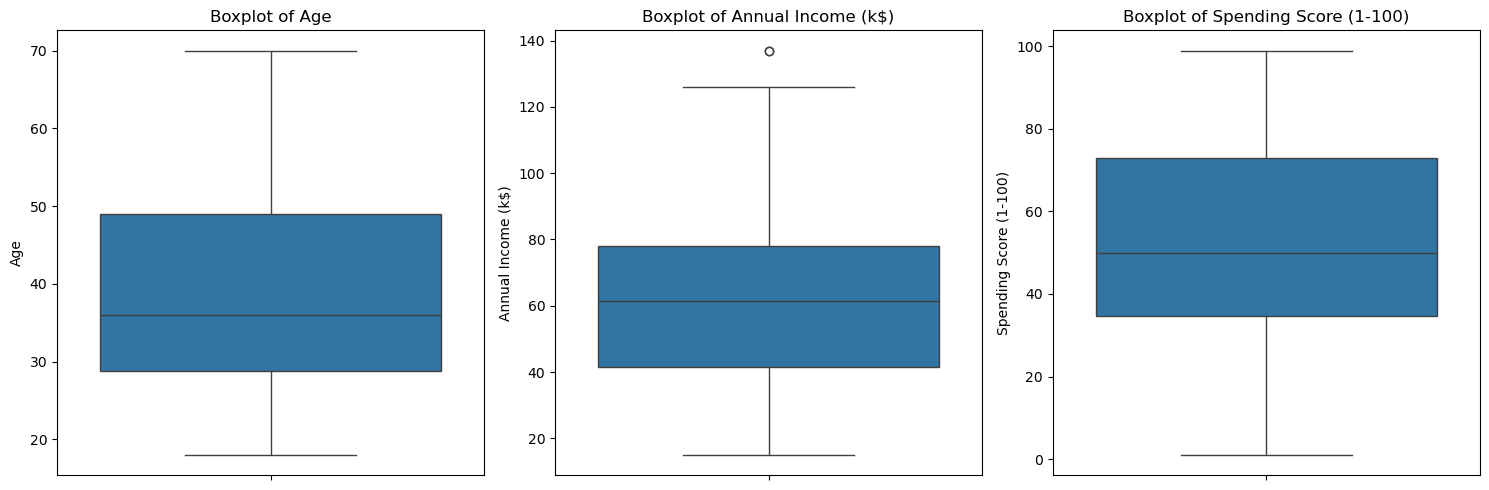

In [7]:
# Plot the spread of Age, Annual Income, and Spending Score using boxplots - Check for outliers

# List of columns to plot
columns_to_plot = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each column in a separate subplot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=dataset[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Display the plots
plt.tight_layout()
plt.show()

One outlier is seen for Annual Income. This person earns above 120k$ annnually

In [8]:
# Check for null values
print(dataset.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


No column has null values

In [9]:
# Check for duplicate values
print(dataset.duplicated().sum())

0


No duplicated rows were found

In [10]:
# Check the first 5 rows of the dataset
print(dataset.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [11]:
# Drop the gender & customer ID columns                                

dataset = dataset.drop(["Gender", "CustomerID"], axis=1)

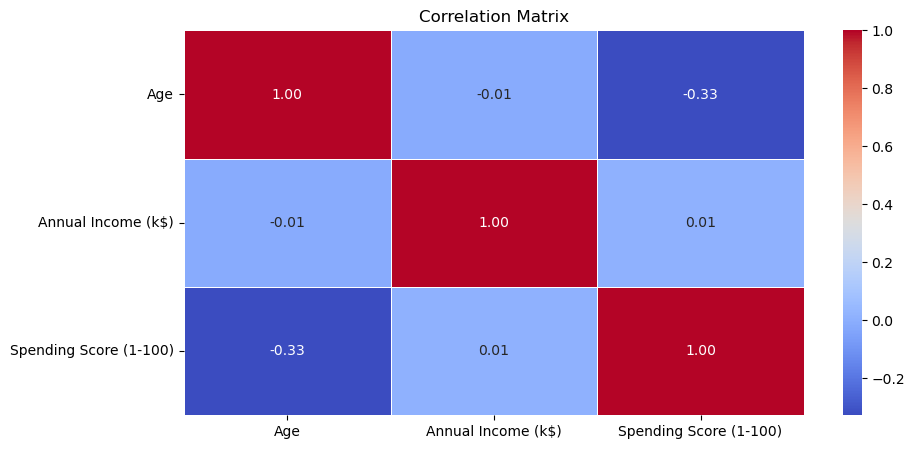

In [12]:
# Plot the correlation matrix using heatmap

# Compute the correlation matrix for numeric columns only
corr_matrix = dataset.corr(numeric_only=True)

plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)


plt.title('Correlation Matrix')
plt.show()

- Annual Income & Spending Score has the lowest correlation of 0.01
- Spending Score & Age has the highest correlation of -0.33
- Annual Income & Age has a correlation of -0.01

In [13]:
# View the first 5 rows of the dataset
print(dataset.head())

   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


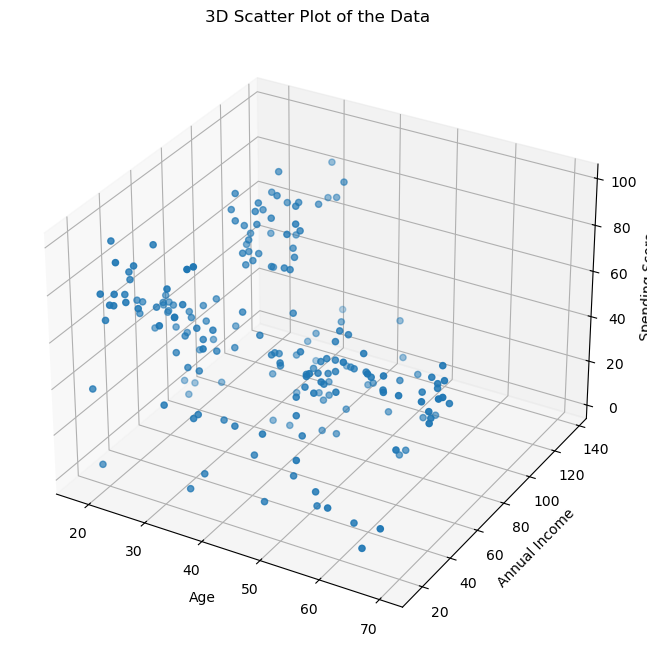

In [14]:
# 3D Scatter Plot of the dataset - Continuous features (Age, Annual Income, Spending Score) only

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(dataset["Age"], dataset["Annual Income (k$)"], dataset["Spending Score (1-100)"])

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')                     

ax.set_title('3D Scatter Plot of the Data')

plt.show()

In [15]:
# Standardize the data using sklearn's StandardScaler to make all the features have thesame scale

sc = StandardScaler()
scaled_dataset = sc.fit_transform(dataset)

# Convert the scaled dataset to a DataFrame
scaled_dataset = pd.DataFrame(scaled_dataset, columns=dataset.columns)

# Display the first 5 rows of the scaled dataset
print(scaled_dataset.head())

        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


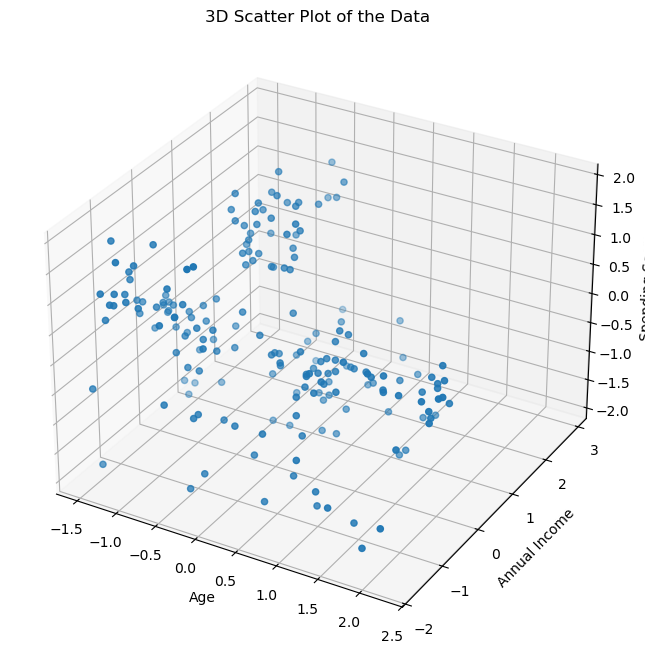

In [16]:
# 3D Scatter Plot of the scaled dataset - Continuous features (Age, Annual Income, Spending Score) only

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_dataset["Age"], scaled_dataset["Annual Income (k$)"], scaled_dataset["Spending Score (1-100)"])

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')                     

ax.set_title('3D Scatter Plot of the Data')


plt.show()

### The Model

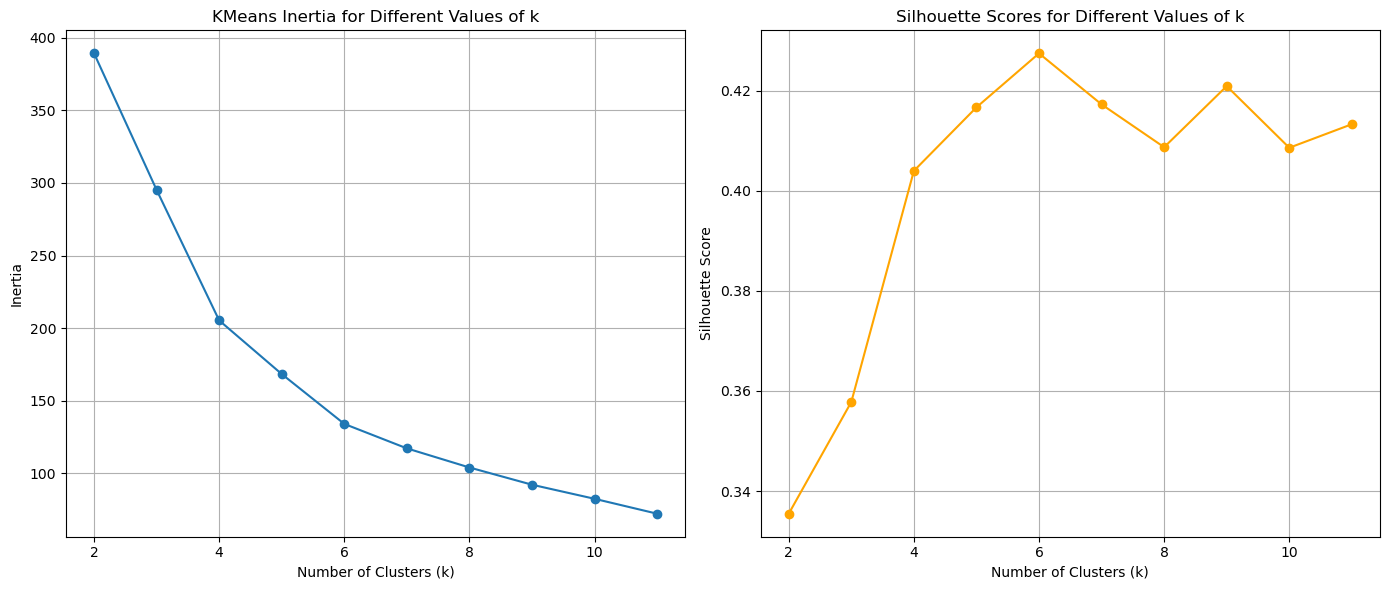

In [17]:
# Determine the optimal number of clusters using the Elbow Method & Silhouette Score


wcss = [] # Within-Cluster Sum of Squares (WCSS)
silhoutte_scores = []  # Silhouette Score   

# Fit KMeans for a range of K values
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_dataset)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS
    sil_score = silhouette_score(scaled_dataset, cluster_labels)
    silhoutte_scores.append(sil_score)


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 12), wcss, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
#plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, 12), silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
#plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

### Silhouette Score

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- $s(i)$ is the silhouette score for a single sample $i$
- $a(i)$ is the average distance between $i$ and all other points in the same cluster,
- $b(i)$ is the minimum average distance between $i$ and all points in the nearest cluster to which $i$ does not belong.

The silhoutte score ranges between $[-1, 1]$, a higher value indicates more distinct clusters.

The highest silhouette score is at *6 clusters*

In [18]:
# Fit the KMeans model to the dataset using all the columns

kmeans = KMeans(n_clusters = 6, n_init='auto', random_state=0)
kmeans.fit(scaled_dataset.values)
cluster_labels = kmeans.fit_predict(scaled_dataset)

print(cluster_labels)

#Print the centre positions of the clusters
centers = kmeans.cluster_centers_
print("We have {} Centroids:".format(len(centers)),"\n", centers, "\n")

[5 5 3 5 5 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3
 5 3 5 0 5 4 5 3 5 4 5 5 5 4 5 5 0 4 4 4 0 5 4 0 5 0 4 0 5 4 0 5 5 0 4 0 0
 0 5 4 4 5 4 0 4 0 4 5 4 4 5 5 4 0 5 4 4 4 5 4 5 4 5 5 4 0 5 4 5 0 4 0 0 0
 5 4 5 5 5 0 4 4 4 5 4 4 2 1 2 4 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 4 2
 1 2 1 2 1 2 1 2 1 2 1 2 4 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
We have 6 Centroids: 
 [[ 1.86593393 -0.28283547 -0.01358755]
 [ 0.05792597  1.04627858 -1.2811115 ]
 [-0.44191719  0.99158305  1.23950275]
 [ 0.52446341 -1.31511764 -1.2725299 ]
 [ 0.58079757 -0.13697372 -0.12644737]
 [-1.00776994 -0.76641278  0.48795716]] 



In [19]:
scaled_dataset["Cluster"] = cluster_labels

scaled_dataset.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,5
1,-1.281035,-1.738999,1.195704,5
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,5
4,-0.563369,-1.662660,-0.395980,5


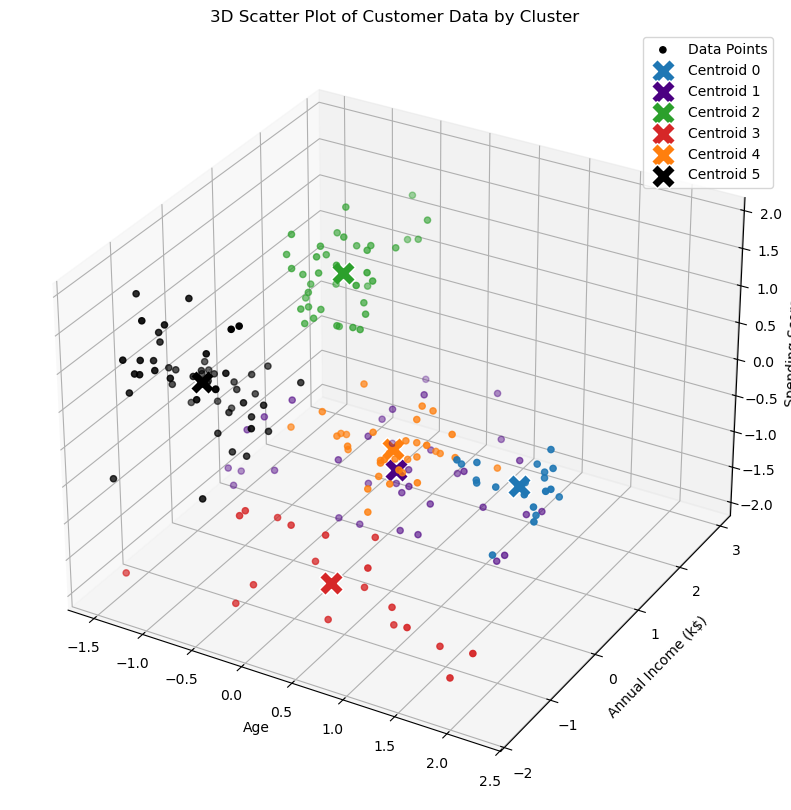

In [21]:
# 3D Plot of the clusters with the centroids

cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#4b0082',  # Purple
                  2: '#2ca02c',  # Green
                  3: '#d62728',  # Red                  
                  4: '#ff7f0e',  # Orange       
                  5: '#000000'}   # Black

# Map clusters to colors using the dictionary
colors = scaled_dataset['Cluster'].map(cluster_colors)

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')



# Scatter plot of the clusters
scatter = ax.scatter(
    scaled_dataset['Age'], 
    scaled_dataset['Annual Income (k$)'], 
    scaled_dataset['Spending Score (1-100)'], 
    c=colors, marker='o', label='Data Points'
)

# Get the cluster labels for the centroids
centroid_labels = kmeans.labels_

# Map centroid colors based on their cluster labels
centroid_colors = [cluster_colors[label] for label in centroid_labels]

# Scatter plot for centroids using the same colors as the clusters
for i in range(len(centers)):
    ax.scatter(
        centers[i, 0], centers[i, 1], centers[i, 2], 
        c=cluster_colors[i], s=300, marker='X', edgecolors='w', label=f'Centroid {i}'
    )

# Set axis labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')
ax.set_title('3D Scatter Plot of Customer Data by Cluster')

# Show legend
ax.legend()

# Display plot
plt.show()

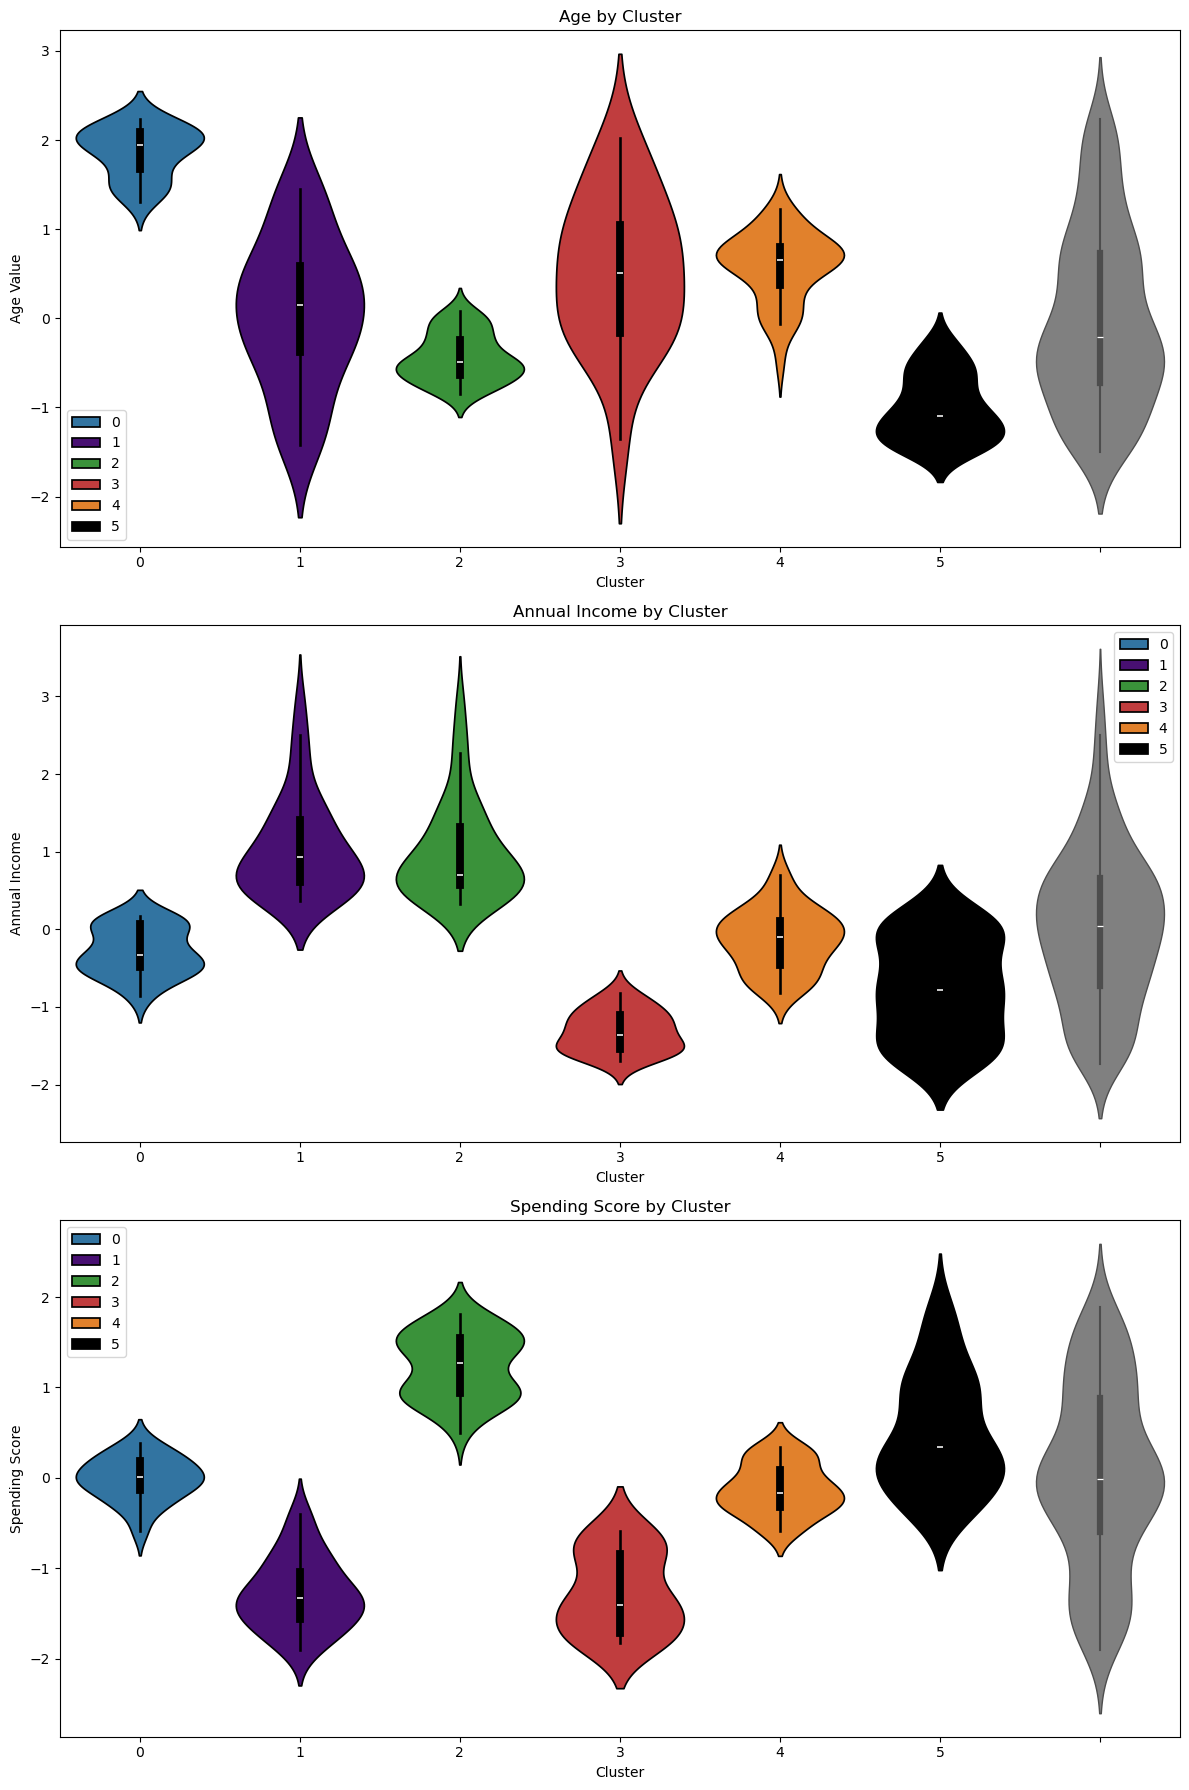

In [23]:
# Violin plot of the clusters

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=scaled_dataset['Cluster'], y=scaled_dataset['Age'], palette=cluster_colors, hue=scaled_dataset["Cluster"])
sns.violinplot(y=scaled_dataset['Age'], color='gray', linewidth=1.0)
plt.title('Age by Cluster')
plt.ylabel('Age Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=scaled_dataset['Cluster'], y=scaled_dataset['Annual Income (k$)'], palette=cluster_colors, hue=scaled_dataset["Cluster"])
sns.violinplot(y=scaled_dataset['Annual Income (k$)'], color='gray', linewidth=1.0)
plt.title('Annual Income by Cluster')
plt.ylabel('Annual Income')


plt.subplot(3, 1, 3)
sns.violinplot(x=scaled_dataset['Cluster'], y=scaled_dataset['Spending Score (1-100)'], palette=cluster_colors, hue=scaled_dataset["Cluster"])
sns.violinplot(y=scaled_dataset['Spending Score (1-100)'], color='gray', linewidth=1.0)
plt.title('Spending Score by Cluster')
plt.ylabel('Spending Score')


plt.tight_layout()
plt.show()

### Cluster Naming, Descriptions & Recommendations

Cluster 0 (Blue) - 
- Name: Steady Seniors
- Description: Old individuals with mid-level income and moderate spending behavior.
- Recommendation: Target this group with loyalty programs or value-based products that emphasise practicality and long-term benefits. They might appreciate senior discounts or bundled offers that provide value for money.


Cluster 1 (Purple) -
- Name: High-Earning Savers
- Description: Customers of all ages with high income but low spending behavior.
- Recommendation: Encourage higher spending by offering premium services, exclusive membership benefits, or rewards programs. Personalised luxury or investment-related services could appeal to this group to increase their spending.


Cluster 2 (Green) -
- Name: Young Luxury Seekers
- Description: Young individuals with high income and high spending behavior.
- Recommendation: Offer this cluster exclusive, trendy, and high-end products that align with their lifestyle. Limited-time offers and influencer marketing could also help attract their attention.


Cluster 3 (Red) - 
- Name: Budget-Conscious
- Description: Individuals across all ages with low income and low spending habits.
- Recommendation: Focus on affordability and discounts for this group. Promotions such as "best value for money" deals or payment plans might appeal to them. Retailers could also introduce cost-saving loyalty programs.


Cluster 4 (Yellow) -
- Name: Mature Mid-Lifers
- Description: Middle-aged individuals with mid-income and moderate spending habits.
- Recommendation: Appeal to their established tastes and needs with practical and family-oriented products or services. Promotions that emphasise reliability, ease of use, and customer service could increase their loyalty.


Cluster 5 (Black)-
- Young Mid-Spenders
- Description: Young individuals with mid-level income and moderate spending habits.
- Recommendation: Target this group with products that offer good value and align with their lifestyle. Focus on promoting aspirational yet affordable options, as they might be open to upgrading in the future.